In [1]:
import pandas as pd

In [2]:
file = '../Resources/cleaned_drug_data.csv'

df = pd.read_csv(file)

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,illegal_score_sum,legal_score_sum,illegal_use,legal_use
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,0,1,0,1,0,3,4,1,1
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,3,0,1
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,1,3,1,1
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,3,0,1
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,1,0,0,3,0,1


In [3]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA', 'illegal_score_sum', 'legal_score_sum',
       'illegal_use', 'legal_use'],
      dtype='object')

In [4]:
#splitting df into test and target data
X = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',\
         'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]

y = df['illegal_use']


# SVC with All Features Scaled

In [5]:
X_dummies = pd.get_dummies(X)

In [6]:
X_dummies

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Age_18-24,Age_25-34,Age_35-44,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [8]:
# scale training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [9]:
# scale X_test
X_test_scaled = scaler.transform(X_test)


In [10]:
# train support vector machine

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.808


In [12]:
from sklearn.metrics import classification_report

target_names = ['non-user', 'user']

predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    non-user       0.78      0.83      0.80       220
        user       0.84      0.79      0.81       249

    accuracy                           0.81       469
   macro avg       0.81      0.81      0.81       469
weighted avg       0.81      0.81      0.81       469



# SVC with only personality

In [13]:
X = df[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
X_dummies = pd.get_dummies(X)

In [14]:
X = df[['Age', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
X_dummies = pd.get_dummies(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [16]:
# scale training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [17]:
# scale X_test
X_test_scaled = scaler.transform(X_test)

In [18]:
# train support vector machine

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.776


In [20]:
from sklearn.metrics import classification_report

target_names = ['non-user', 'user']

predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    non-user       0.77      0.75      0.76       220
        user       0.78      0.80      0.79       249

    accuracy                           0.78       469
   macro avg       0.78      0.77      0.77       469
weighted avg       0.78      0.78      0.78       469



## SVC for Individual Drugs

In [ ]:
#splitting df into test and target data
X = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',\
         'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
X_dummies = pd.get_dummies(X)

In [ ]:
drugs = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff',\
         'Cannabis', 'Choc', 'Coke', 'Crack','Ecstasy',\
         'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',\
         'Nicotine', 'VSA']

for drug in drugs:
    y = df[drug]
    
    X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    
    print(drug)
    print(y.value_counts())
    
    print('Test Acc: %.3f' % model.score(X_test, y_test))
    
    target_names = ['non-user', 'user']

    predictions = model.predict(X_test)
    print(drug)
    print(classification_report(y_test, predictions,
                            target_names=target_names))
    


# Visualizing Individual Drugs

In [ ]:
 from sklearn.manifold import TSNE
 import matplotlib.pyplot as plt

In [ ]:
for drug in drugs:
    tsne = TSNE(learning_rate=35)
    X_dummies = pd.get_dummies(X)
    tsne_features = tsne.fit_transform(X_dummies)
    
    # The first column of transformed features
    X_dummies['x'] = tsne_features[:,0]

    # The second column of transformed features
    X_dummies['y'] = tsne_features[:,1]
    
    labels = df[drug]
    
    plt.scatter(X_dummies['x'], X_dummies['y'], c=labels)
    plt.show()

## Visualizing Clusters

In [21]:
 from sklearn.manifold import TSNE
 import matplotlib.pyplot as plt

In [22]:
 # Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [23]:
# Reduce dimensions
X_dummies = pd.get_dummies(X)
tsne_features = tsne.fit_transform(X_dummies)

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [24]:
 # Prepare to plot the dataset

# The first column of transformed features
X_dummies['x'] = tsne_features[:,0]

# The second column of transformed features
X_dummies['y'] = tsne_features[:,1]

In [25]:
labels = y
labels.value_counts()

1    1002
0     874
Name: illegal_use, dtype: int64

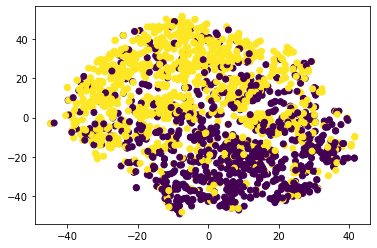

In [26]:
 # Visualize the clusters
plt.scatter(X_dummies['x'], X_dummies['y'], c=labels)
plt.show()